# Applied ML

We will apply Machine Learning to an interesting dataset about soccer players and referees.
The work will be divided in two parts, first a pre-processing + visualization pipeline to get comfortable with the data, and finally the prediction tasks, where the color of the skin of players will be inferered from other different parameters (features).

In [211]:
# A number of libraries will be used:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

## 1. Pre-processing and Visualization

### 1.3 Pre-processing

In [212]:
#Loading the data to a DataFrame and quick visualization of what we have
df = pd.read_csv('CrowdstormingDataJuly1st.csv')
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


A simple description of the data reveals how incomplete it is. Will need cleaning!

In [213]:
df.describe()

C:\Users\dunay\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


Having in mind that our final goal is to predict the skintone, we can already get rid of all the rows that don't have values on this. Also we need to create an aggregate of the two raters scores to act as our labels for classification.

In [214]:
df1 = df.dropna(axis=0, subset=['rater1', 'rater2'], how='any')

#For the aggregate, the simplest thing is to compute the mean, although it will increase the possible "skintones" from
# 5 to 9! We multiply by 8 as a trick to make everything intergers instead of floats. This would be needed in randomForest.
df1['Skintone']= (df1.loc[:,'rater1']+df1.loc[:,'rater2'])*8/2 
df1.Skintone.value_counts()

C:\Users\dunay\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2.0    38517
0.0    33723
1.0    17876
4.0     8989
8.0     7570
6.0     7079
3.0     5609
7.0     2841
5.0     2417
Name: Skintone, dtype: int64

There are many parameters that simply wont help to discriminate between skintone. We can dispose of them. (Command "drop" repeated for readability and quick modification).

An important decision on this step has to do with the elimination of IAT and EXP indicator related to the referee. Our assumption is that the skintone of the players (to be predicted) is independent of this values. Much have been debated upon how a potentially racist referee along with many yellow/red cards to a player can be a good predictor of the player being black. Indeed, this is a possibility. However, because an overall trend of racism would ultimately lead to a black player receiving more yellow/red cards on average, we still preserve part of the previous information from the global perspective, and thus feel no need to analyze in such fine granularity. If racism is not a trend, but only influence a few referees, unfortunatedly this decisive information will average out.

In [ ]:
df1.drop('player', axis=1, inplace=True)      #The name is no use, we keep playerShort as the identifier
df1.drop('photoID', axis=1, inplace=True)     #Trash
df1.drop('rater1', axis=1, inplace=True)      #Not needed anymore
df1.drop('rater2', axis=1, inplace=True)      #Not needed anymore
df1.drop('refNum', axis=1, inplace=True)      #Referee should be independent or at most correlated through country
df1.drop('refCountry', axis=1, inplace=True)  #refCountry because it feels like cheating to look into the country of origin
df1.drop('Alpha_3', axis=1, inplace=True)     #Alpha_3 because it feels like cheating to look into the country of origin
df1.drop('meanIAT', axis=1, inplace=True)     #Because we are going to group by playerShort and referee data cannot be mixed
df1.drop('nIAT', axis=1, inplace=True)        #Because we are going to group by playerShort and referee data cannot be mixed
df1.drop('seIAT', axis=1, inplace=True)       #Because we are going to group by playerShort and referee data cannot be mixed
df1.drop('meanExp', axis=1, inplace=True)     #Because we are going to group by playerShort and referee data cannot be mixed
df1.drop('nExp', axis=1, inplace=True)        #Because we are going to group by playerShort and referee data cannot be mixed
df1.drop('seExp', axis=1, inplace=True)       #Because we are going to group by playerShort and referee data cannot be mixed

In [216]:
df1.head()

,playerShort,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,Skintone
0,lucas-wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,3.0
1,john-utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,6.0
5,aaron-hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,1.0
6,aleksandar-kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,1.0
7,alexander-tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,8.0


In [217]:
df1.shape

(124621, 16)

In [218]:
#We eliminate all the rows with missing values of interest
df2 = df1.dropna(axis=0, how='any')
df2.shape

(115603, 16)

We have trashed around 10% of the data, but we believe it is acceptable as we still have over 100k entries left.

Now we will split the data in two, to make the aggregation by player easier. This is done separating sumable features(to be averaged) from those that are not summable (easier to simplify). We asumme that the player remains in the same "club" (and the same "leagueCountry"  consequentially), with the same "position" for the entire season (2012-2013). We shall divide by the total number of games after aggregation

In [219]:
#In both cases we keep the identifier
df_summable = df2.loc[:,["playerShort", "games", "victories", "ties", "defeats", "goals", "yellowCards", "yellowReds", "redCards"]]
df_non_summable = df2.loc[:,["playerShort", "club", "leagueCountry", "birthday", "height", "weight", "position", "Skintone"]]

In [220]:
# And addition for the summables
df_g_summable = df_summable.groupby(['playerShort']).sum()
df_g_summable = df_g_summable.apply(lambda x: x[1:]/x.games, axis=1)
df_g_summable.head()

,victories,ties,defeats,goals,yellowCards,yellowReds,redCards
playerShort,,,,,,,
aaron-hughes,0.377676,0.273700,0.348624,0.013761,0.029052,0.000000,0.000000
aaron-hunt,0.419643,0.217262,0.363095,0.184524,0.125000,0.000000,0.002976
aaron-lennon,0.485437,0.235437,0.279126,0.075243,0.026699,0.000000,0.000000
aaron-ramsey,0.576923,0.161538,0.261538,0.150000,0.119231,0.000000,0.003846
abdelhamid-el-kaoutari,0.330645,0.322581,0.346774,0.008065,0.064516,0.032258,0.016129


In [221]:
# Simply drop duplicates for the non-summables
df_g_non_summable = df_non_summable.drop_duplicates(subset='playerShort', keep='first').set_index(['playerShort'])
df_g_non_summable.sort_index().head()

,club,leagueCountry,birthday,height,weight,position,Skintone
playerShort,,,,,,,
aaron-hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1.0
aaron-hunt,Werder Bremen,Germany,04.09.1986,183.0,73.0,Attacking Midfielder,1.0
aaron-lennon,Tottenham Hotspur,England,16.04.1987,165.0,63.0,Right Midfielder,2.0
aaron-ramsey,Arsenal FC,England,26.12.1990,178.0,76.0,Center Midfielder,0.0
abdelhamid-el-kaoutari,Montpellier HSC,France,17.03.1990,180.0,73.0,Center Back,2.0


In [222]:
# Add up total number of games
df_g_games = df_games.groupby(['playerShort']).sum()
df_g_games.head()

,games
playerShort,
aaron-hughes,654
aaron-hunt,336
aaron-lennon,412
aaron-ramsey,260
abdelhamid-el-kaoutari,124


In [223]:
# We check that indeed, each dataframe has the same number of rows
print(df_g_summable.shape)
print(df_g_non_summable.shape)
print(df_g_games.shape)

(1419, 7)
(1419, 7)
(1419, 1)


In [224]:
# Merging the three again
df_by_player = pd.concat([df_g_non_summable, df_g_summable, df_g_games], axis=1, join='outer')
df_by_player.head()

,club,leagueCountry,birthday,height,weight,position,Skintone,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,games
aaron-hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1.0,0.377676,0.273700,0.348624,0.013761,0.029052,0.000000,0.000000,654
aaron-hunt,Werder Bremen,Germany,04.09.1986,183.0,73.0,Attacking Midfielder,1.0,0.419643,0.217262,0.363095,0.184524,0.125000,0.000000,0.002976,336
aaron-lennon,Tottenham Hotspur,England,16.04.1987,165.0,63.0,Right Midfielder,2.0,0.485437,0.235437,0.279126,0.075243,0.026699,0.000000,0.000000,412
aaron-ramsey,Arsenal FC,England,26.12.1990,178.0,76.0,Center Midfielder,0.0,0.576923,0.161538,0.261538,0.150000,0.119231,0.000000,0.003846,260
abdelhamid-el-kaoutari,Montpellier HSC,France,17.03.1990,180.0,73.0,Center Back,2.0,0.330645,0.322581,0.346774,0.008065,0.064516,0.032258,0.016129,124


We can now drop every player that hasn't participated in a minimum number of games, due to many of his averaged parameters being of questionable statistical validity.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247A6700978>]], dtype=object)

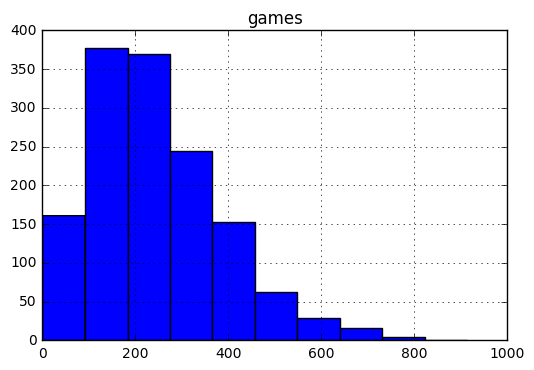

In [225]:
df_g_games.hist()

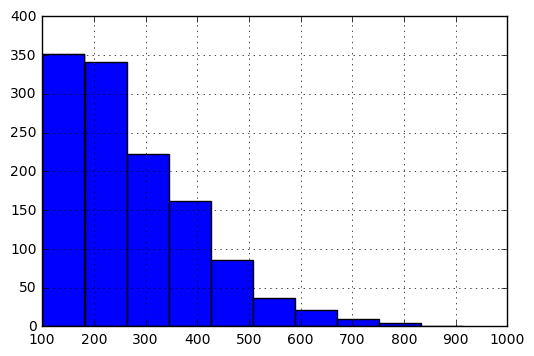

In [226]:
#We set the minimum number of games played to 100, eliminating around 150 players with scarse data
df_by_player = df_by_player.query('games>100')
df_by_player.games.hist()

An extra transformation that seems reasonable is to change the "birthday" parameter for an "age" parameter

In [227]:
# Transform to datetime and substract to the season's year when we collected the data
df_by_player['age'] = pd.to_datetime(df_by_player.birthday).map(lambda x: 2012 - x.year)

# We can now drop the "birthday" parameter
df_by_player.drop('birthday', axis=1, inplace=True)

df_by_player.age.head()

aaron-hughes              33
aaron-hunt                26
aaron-lennon              25
aaron-ramsey              22
abdelhamid-el-kaoutari    22
Name: age, dtype: int64

The final step is to transform categorical variables to dummy variables, that are more friendly to machine learning algorithms. An important note is that dummy variables greatly increases the number of features due to the huge number of clubs, and makes us vulnerable to the curse of dimensionality as well as overfitting.

In [228]:
# Categorical to dummy
data = pd.get_dummies(df_by_player)
data.head()

,height,weight,Skintone,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,...,position_Center Forward,position_Center Midfielder,position_Defensive Midfielder,position_Goalkeeper,position_Left Fullback,position_Left Midfielder,position_Left Winger,position_Right Fullback,position_Right Midfielder,position_Right Winger
aaron-hughes,182.0,71.0,1.0,0.377676,0.273700,0.348624,0.013761,0.029052,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron-hunt,183.0,73.0,1.0,0.419643,0.217262,0.363095,0.184524,0.125000,0.000000,0.002976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron-lennon,165.0,63.0,2.0,0.485437,0.235437,0.279126,0.075243,0.026699,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
aaron-ramsey,178.0,76.0,0.0,0.576923,0.161538,0.261538,0.150000,0.119231,0.000000,0.003846,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abdelhamid-el-kaoutari,180.0,73.0,2.0,0.330645,0.322581,0.346774,0.008065,0.064516,0.032258,0.016129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A different approach that is also worth trying, and that aims to avoid the feature space explosion, is to go from categorical strings to numerical codes that can be handled by a random forest. The interpretability of the results can be however much more tricky.

We decided to try both things and see what resulted in better performance.

In [229]:
# Finding the categorical variables
cat_columns = df_by_player.select_dtypes(['object']).columns
cat_columns

Index(['club', 'leagueCountry', 'position'], dtype='object')

In [230]:
# Transforming to numerical
data1 = df_by_player
data1[cat_columns] = df_by_player[cat_columns].apply(lambda x: x.astype('category').cat.codes)
data1.head()

,club,leagueCountry,height,weight,position,Skintone,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,games,age
aaron-hughes,30,0,182.0,71.0,1,1.0,0.377676,0.273700,0.348624,0.013761,0.029052,0.000000,0.000000,654,33
aaron-hunt,81,2,183.0,73.0,0,1.0,0.419643,0.217262,0.363095,0.184524,0.125000,0.000000,0.002976,336,26
aaron-lennon,74,0,165.0,63.0,10,2.0,0.485437,0.235437,0.279126,0.075243,0.026699,0.000000,0.000000,412,25
aaron-ramsey,6,0,178.0,76.0,3,0.0,0.576923,0.161538,0.261538,0.150000,0.119231,0.000000,0.003846,260,22
abdelhamid-el-kaoutari,45,1,180.0,73.0,1,2.0,0.330645,0.322581,0.346774,0.008065,0.064516,0.032258,0.016129,124,22


The data is ready. Now we can do some extra visualizations or go directry to the machine learning tasks

### 1.2 Visualizations

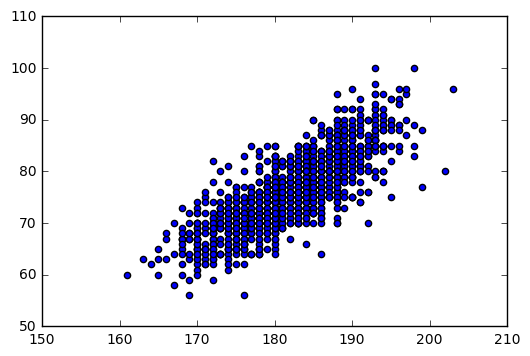

In [231]:
# A simple height,weight
plt.scatter(df_by_player.height,df_by_player.weight)

## 2. Machine Learning

In [232]:
#Seed initialization for repeatability
np.random.seed(seed=42) #The answer is 42 ;)

Splitting the data into working blocks (for our two versions)

In [233]:
data_dummyvar = data.drop(['Skintone'], axis=1) ## Dummy variables 
target_dummyvar = data.Skintone.values.tolist()

data_numvar = data1.drop(['Skintone'], axis=1)  ## Numerical Variables
target_numvar = data1.Skintone.values.tolist()

### 2.1 Random Forest

In [234]:
from sklearn.ensemble import RandomForestClassifier

'''
RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
  max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, 
  n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)[source]

'''

rf = RandomForestClassifier(n_estimators=100)

 #### ~ Question (1): Dummy Variables or Numerical Variables?

Or first question to answer is whether to use the categorical transformation to Dummy Variables or to Numerical Variables and whether it would have an influence in our results. We score several random forests with different max depth parameters in both version of the data to compare the results. *Note: These random forests are built naively and may suffer from many defects that we will account for in later stages of this homework*

In [235]:
from sklearn.model_selection import GridSearchCV
'''
GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, 
    cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)[source])
'''
max_depth = [1, 3, 5, 10, 20]
tuned_parameters = [{'max_depth': max_depth}]
clf = GridSearchCV(rf, tuned_parameters, cv=10)

For Dummy Variables:

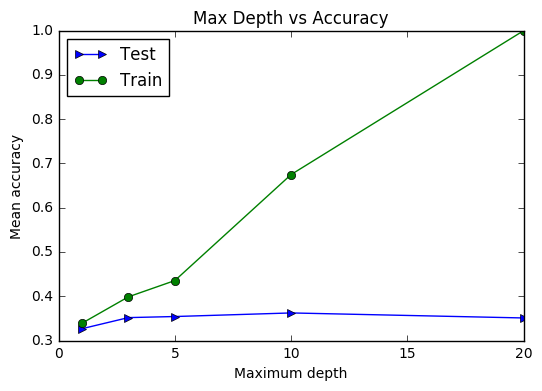

In [236]:
clf.fit(data_dummyvar, target_dummyvar);

plt.plot(max_depth, clf.cv_results_['mean_test_score'], 'b>-')
plt.plot(max_depth, clf.cv_results_['mean_train_score'], 'go-');
plt.title('Max Depth vs Accuracy'); plt.legend( ('Test', 'Train'), loc='upper left')
plt.xlabel('Maximum depth'); plt.ylabel('Mean accuracy'); 

For Numerical Variables:

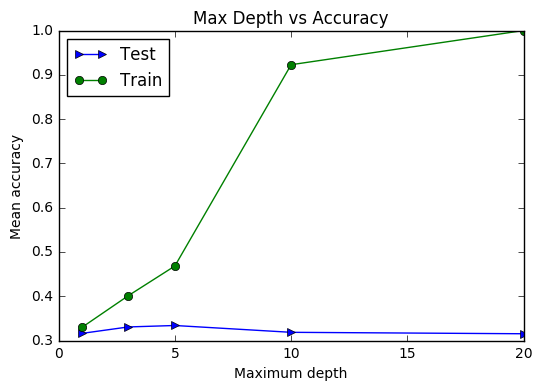

In [237]:
clf.fit(data_numvar, target_numvar);

plt.plot(max_depth, clf.cv_results_['mean_test_score'], 'b>-')
plt.plot(max_depth, clf.cv_results_['mean_train_score'], 'go-');
plt.title('Max Depth vs Accuracy'); plt.legend( ('Test', 'Train'), loc='upper left')
plt.xlabel('Maximum depth'); plt.ylabel('Mean accuracy');

#### ~ Conclusion (1) : 

From the plots we see that the **numerical representation of categorical variables is more powerful than the dummy variable representation**. It allows for instance to select two leagues at the same time, or several positions in the field. This power translates to steeper overfitting on the train set, but the model hasn't been able to convert it into relevant improvement for new samples classification.

**Our choice is to continue onwards with the numerical representation** to be able to later tap into this extra power and to avoid the curse of dimensionality particularly worrisome in the later stage of clustering. The drawback, we remind, is the loss of interpretability.

In [238]:
features = data_numvar

#### ~ Question (2): Multiclass or Binary? (And how)

Currently we attempt a 9-class classfication problem as after computing the average of the two raters we are left with 9 different tonalities of skincolor (see the pre-processing section). Achieving have high accuracy on predicting the tonality to such fine detail not only presents an arduos task, but also feels not aligned with the motivation of this project, namely (and rather brutally) classify between white and black players.

#### ~ Conclusion (2) : 

We can already see from the previous plots that the 9-class problem is not going to derive a satisfactory solution. We propose a binary classification that discriminates between white (Skintone <= 6 in our scale) or black (Skintone > 6) players. (The value > 6 accounts for at least one of the two raters giving the maximum skintone to the player). We shall continue studying the performance on this model.


In [239]:
labels = ((np.array(target_numvar) > 6) *1).tolist() # 1 if black, 0 if white

Repeating again the previous experiment naively we already attein much better resutls due to the simplified task:

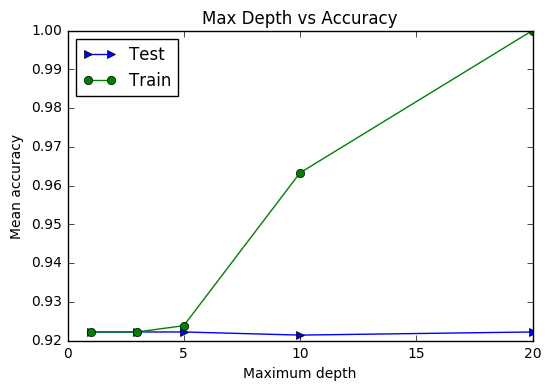

In [240]:
clf.fit(features, labels);

plt.plot(max_depth, clf.cv_results_['mean_test_score'], 'b>-')
plt.plot(max_depth, clf.cv_results_['mean_train_score'], 'go-');
plt.title('Max Depth vs Accuracy'); plt.legend( ('Test', 'Train'), loc='upper left')
plt.xlabel('Maximum depth'); plt.ylabel('Mean accuracy');

**But there is a catch! Our two classes are highly imbalanced.** With the number of black players in european leagues being much smaller that the number of white players, one could simply predict by saying that everyone is white and still land a great accuracy. To investigate into this we have a look at the **confusion matrix**, and indeed we check that this is what is happening.

In [241]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

rf = RandomForestClassifier(n_estimators=100, max_depth=5) # Max depth 5 seems reasonable from the previous plot
predicted = cross_val_predict(rf, features, labels, cv=10)
confusion_matrix(y_true=labels, y_pred=predicted)

array([[1138,    0],
       [  96,    0]])

A way to fight class-imbalance is to define higher class weight for less represented classes, and that is exactly what we are going to do. We simply need to add the option class_weight="balanced" to our model. **Our new confusion matrix looks indeed much less biased**.

In [242]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced') # Max depth 5 seems reasonable from the previous plot
predicted = cross_val_predict(rf, features, labels, cv=10)
confusion_matrix(y_true=labels, y_pred=predicted)

array([[992, 146],
       [ 66,  30]])

#### Tuning agains overfitting
We have now a way to get a compromise between precision and recall but we can still improve our classifier and study how different parameters affect the overfitting of the model.

##### <ul> <li> Max depth <ul\>

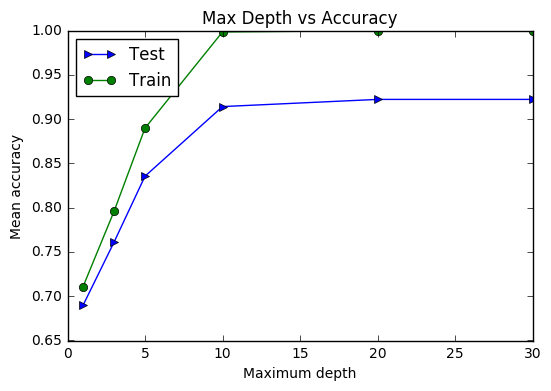

In [243]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

max_depth = [1, 3, 5, 10, 20, 30]
tuned_parameters = [{'max_depth': max_depth}]

clf = GridSearchCV(rf, tuned_parameters, cv=10)
clf.fit(features, labels);

plt.plot(max_depth, clf.cv_results_['mean_test_score'], 'b>-')
plt.plot(max_depth, clf.cv_results_['mean_train_score'], 'go-');
plt.title('Max Depth vs Accuracy'); plt.legend( ('Test', 'Train'), loc='upper left')
plt.xlabel('Maximum depth'); plt.ylabel('Mean accuracy');

From the previous plot we conclude that the best comprimise for the maximum depth of the trees is arguably around 20 (where the test accury plateaus). However, if we were to take 20 (we did this experiment) the model would overfit and the confusion matrix would again shift to the imbalanced one. To really fight overfitting, we decided to continue our experiments with a maximum depth of 5.

##### <ul> <li> Number of trees in the forest <ul\>

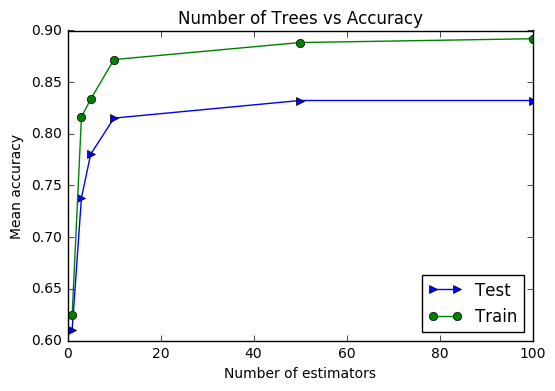

In [244]:
rf = RandomForestClassifier(max_depth=5, class_weight='balanced')

n_estimators = [1, 3, 5, 10, 50, 100]
tuned_parameters = [{'n_estimators': n_estimators}]

clf = GridSearchCV(rf, tuned_parameters, cv=10)
clf.fit(features, labels);

plt.plot(n_estimators, clf.cv_results_['mean_test_score'], 'b>-')
plt.plot(n_estimators, clf.cv_results_['mean_train_score'], 'go-');
plt.title('Number of Trees vs Accuracy'); plt.legend( ('Test', 'Train'), loc='lower right')
plt.xlabel('Number of estimators'); plt.ylabel('Mean accuracy');

From the previous plot we conclude that the best comprimise for the number of estimators (or trees) is arguably around 50 (where the test accury plateaus). We were taking 100 before as a safe measure, but 50 looks enough. However, despite the computational load being lower, training less trees won't help us fight overfitting.

#### ~ Question (3): Feature Importance

After tuning the parameters to attein the best classifier we now wonder how important is the role of each feature that it uses. There are two ways to look into it. First and simpler, use the "feature_importances" attribute of the model. Second a little more engaging, do recursive feature elimination.

In [245]:
rf = RandomForestClassifier(n_estimators = 50, max_depth=5, class_weight='balanced')
predicted = cross_val_predict(rf, features, labels, cv=10)
confusion_matrix(y_true=labels, y_pred=predicted)

array([[983, 155],
       [ 67,  29]])

##### Feautre Importance

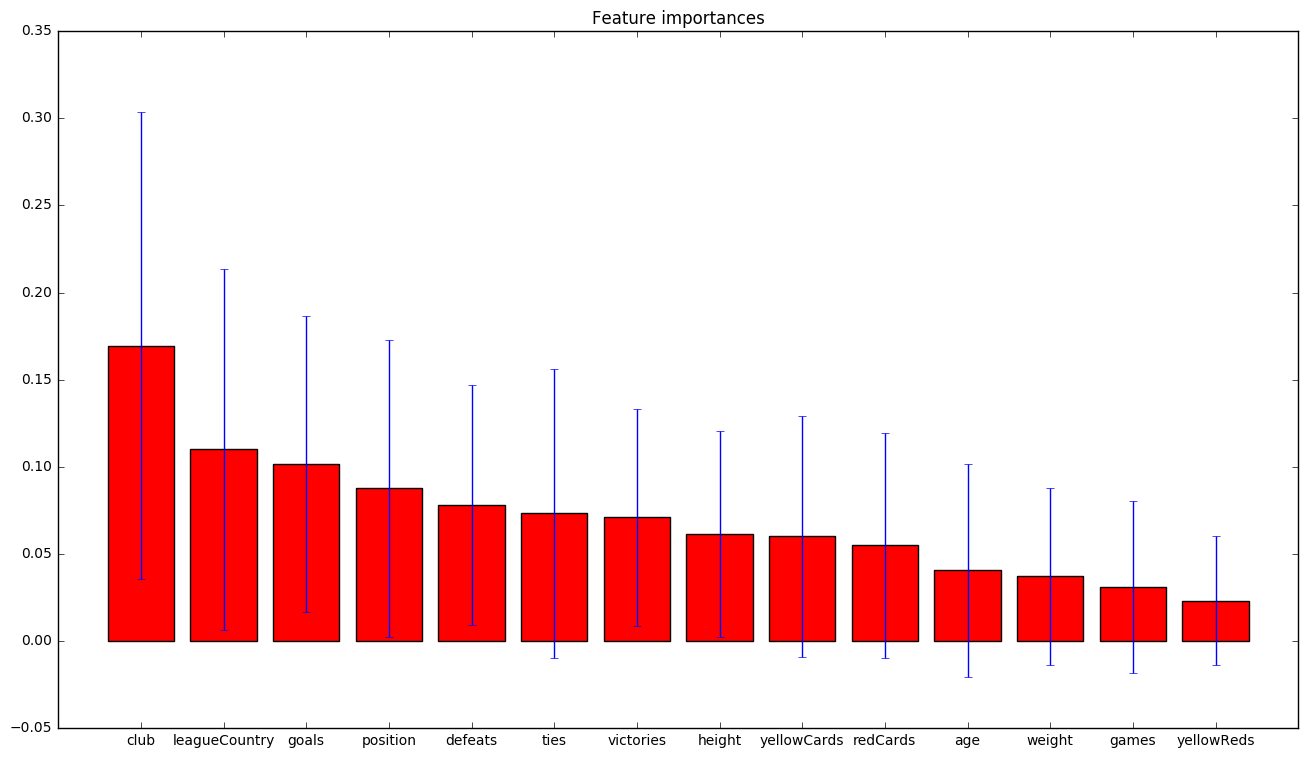

In [246]:
rf.fit(features,labels)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]


# Plot the feature importances of the forest
X = features
f = np.asarray(features.columns.tolist())

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), f[indices])
plt.xlim([-1, X.shape[1]])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

##### Recursive Feature Elimination

In [254]:
from sklearn.feature_selection import RFECV

#Step and elimnate features
rfecv = RFECV(rf, step=1, cv=10)
rfecv = rfecv.fit(features, labels)
# summarize the selection of the attributes
print(rfecv.support_)
print(rfecv.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False]
[1 1 1 1 1 1 1 1 1 1 1 1 1 2]


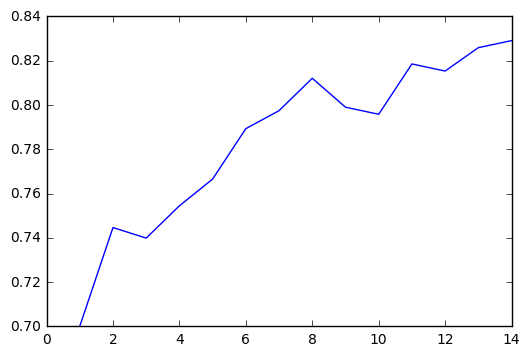

In [253]:
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

#### ~ Conclusion (3): Feature Importance

From the plot we note that the variance on importance is too high to draw any strong conclusion. Overall "club" and "leagueCountry" seem to be the most discriminant features. Our intuition is that french clubs have more dark skin players. Due to the inestability, in every run we get a different order on the importance of features, and thus we cannot evaluate whether feeding the model without a few of them would change the importances of the rest.

From the recursive elimination we get that every features is important and furthermore, roughly equally important. Except **"age"**! Which kind of makes sense. Finally we see that the more features, the better.

### BONUS!

### 2.2 Unsupervised Learning 

Now we want to create two clusters with unsupervised learning. We are gonna do binary classification just like before, but this time we are not gonna tell the model who is black and who is white, only that there are two kinds of players. Maybe it comes up with clusters for different skintones, or maybe it finds that the best way to cluster is among tall and heavy players and small and lightweight.

We remove features iteratively and compute the silhouette score for different clustering results.

In [288]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats.mstats import zscore

n_clusters = 2
num_features = len(f)
silhouette_score_arr = []
mean_arr = []
std_arr = []

for i in range(num_features,0,-1):
    X = zscore(features.iloc[:,range(0,i)])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("The average silhouette_score is :", np.round(silhouette_avg,3))
    silhouette_score_arr.append(silhouette_avg)

The average silhouette_score is : 0.121
The average silhouette_score is : 0.128
The average silhouette_score is : 0.127
The average silhouette_score is : 0.143
The average silhouette_score is : 0.156
The average silhouette_score is : 0.172
The average silhouette_score is : 0.185
The average silhouette_score is : 0.174
The average silhouette_score is : 0.196
The average silhouette_score is : 0.23
The average silhouette_score is : 0.25
The average silhouette_score is : 0.296
The average silhouette_score is : 0.43
The average silhouette_score is : 0.644


There is a big difference in the silhouette score when we include too many features. **The data is best separated when we only consider 1 feature.**

Now we experiment (no all shown here) with different features and combinations of features computing both the silhouette score and the accuracy of the classification for the binary problem as defined before.

In [286]:
X=zscore(features.loc[:,["leagueCountry"]])
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("The average silhouette_score is :", np.round(silhouette_avg,3))
silhouette_score_arr.append(silhouette_avg)

The average silhouette_score is : 0.745


In [287]:
## Accuracy of the cluster
sum(cluster_labels == labels) / len(labels)

0.62479740680713125

In [294]:
confusion_matrix(y_true=labels, y_pred=cluster_labels)

array([[652, 486],
       [ 32,  64]])

Our finding is that "leagueCountry" makes the better separation of the data (highest silhouette score) with an accuracy of 0.625 on the binary classification. Substantially better than random.